# Analysis of Variance (ANOVA) Modeling

In [1]:
#========================================================================================
# CODE NAME     : ANOVA Modeling.py
# PURPOSE       : Demonstrate application of ANOVA using Pandas,Statsmodels and so on 
# APPLICATION   : Analyzing Sales Difference and Blood Pressure differences
#=========================================================================================

In [1]:
# Get the Sales data across different regions
import numpy as np
import pandas as pd

store = pd.read_excel("C:\\Users\\Training\\Data Science using SAS and Python\\Data\\store.xlsx")
store.head()

,region,advertising,gender,book_sales,music_sales,electronic_sales,total_sales,sales
0,North,Yes,M,500,200,300,900,300
1,North,Yes,F,600,100,400,1100,400
2,North,No,M,400,200,150,750,150
3,North,No,F,350,250,300,900,300
4,North,No,M,100,125,150,375,150


In [3]:
# Get the Mean of Electronic Sales across regions
electronic_sales_stats = pd.DataFrame(store.groupby("region").electronic_sales.describe())
print("Descriptive Statistics of Eletronic Sales across regions")
electronic_sales_stats.round(2)

Descriptive Statistics of Eletronic Sales across regions


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
East,5.0,1840.0,1908.66,300.0,400.0,1500.0,2000.0,5000.0
North,5.0,260.0,108.40,150.0,150.0,300.0,300.0,400.0
South,5.0,2920.0,2705.00,400.0,700.0,2500.0,4000.0,7000.0
West,5.0,13900.0,14993.33,500.0,1000.0,8000.0,30000.0,30000.0


Box and Whisker plot of Eletronic Sales across regions


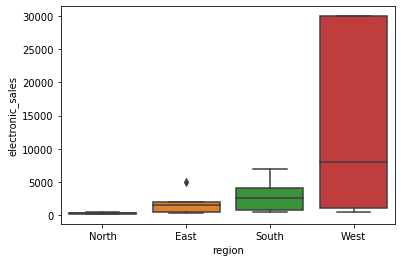

In [4]:
# Box-Plot for electronic sales across regions
import seaborn as sns
print("Box and Whisker plot of Eletronic Sales across regions")
box_plt = sns.boxplot(y = "electronic_sales", x = "region", data = store)

In [5]:
# One-Way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_model = ols('electronic_sales ~ region', data = store).fit()
anova_table = sm.stats.anova_lm(anova_model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
region,3.0,578490000.0,192830000.0,3.271469,0.04862
Residual,16.0,943087000.0,58942937.5,NaN,NaN


In [6]:
# Get the Summary 
anova_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       electronic_sales   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     3.271
Date:                Sun, 21 Mar 2021   Prob (F-statistic):             0.0486
Time:                        09:02:19   Log-Likelihood:                -205.07
No. Observations:                  20   AIC:                             418.1
Df Residuals:                      16   BIC:                             422.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1840.0000   3433.451      0.536      0.599   -5438.592    9118.592
region[T.North] -1580.0000   4855.633     -0.325      0.749   -1.19e+04    8713.483
region[T.South]  1080.0000   4855.633      0.222      0.827   -9213.483    1.14e+04
region[T.West]   1.206e+04   4855.633      2.484      0.024    1766.517    2.24e+04
==============================================================================
Omnibus:                        4.859   Durbin-Watson:                   2.441
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                2.712
Skew:                           0.564   Prob(JB):                        0.258
Kurtosis:                       4.407   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ANOVA Assumption Checks

In [7]:
#--------------------------------------------------------------------
# Assumption 1: Homogeniety of Varience across the treatments/groups
#--------------------------------------------------------------------

def LEVENE_test(predictor_var):

    # Import Scipy LEVENE's function
    from scipy.stats import levene

    # Group the data based on predictor variable
    treatments = store.groupby(predictor_var)
    
    #Create empty list to hold one dimensional data for each treatments/groups
    levene_data = []
    
    # Iterate over all groups/treatments to prepare data for LEVENE Test
    for grp_name,grp_valuevalue in treatments:
        levene_data.append(grp_valuevalue.electronic_sales.tolist())
    
    levene_f,levene_p = levene(*levene_data)    
    return levene_f,levene_p,levene_data

LEVENE_test(predictor_var = "region")

(5.640786752028491,
 0.007823187460445078,
 [[1500, 2000, 400, 300, 5000],
  [300, 400, 150, 300, 150],
  [2500, 4000, 7000, 400, 700],
  [8000, 30000, 1000, 500, 30000]])

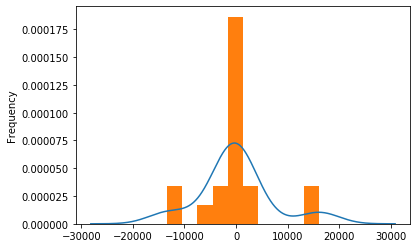

In [8]:
#--------------------------------------------
# Assumption 2: Normality of Error/Residuals
#--------------------------------------------
anova_resid = pd.Series(anova_model.resid)
anova_resid.plot.kde()
anova_resid.plot.hist(density = True)

# ANOVA Post Hoc Studies

In [9]:
# Analyse which pairs of Mean are significantally different
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)

# Set up data for Multiple Comparison. Class Object
multicomp_data = MultiComparison(store['electronic_sales'],
                               store['region'])
anova_multocomp = multicomp_data.tukeyhsd(alpha = 0.10).summary()
anova_multocomp

group1,group2,meandiff,p-adj,lower,upper,reject
East,North,-1580.0,0.9,-13666.3908,10506.3908,False
East,South,1080.0,0.9,-11006.3908,13166.3908,False
East,West,12060.0,0.101,-26.3908,24146.3908,False
North,South,2660.0,0.9,-9426.3908,14746.3908,False
North,West,13640.0,0.0552,1553.6092,25726.3908,True
South,West,10980.0,0.1492,-1106.3908,23066.3908,False


# N-Way ANOVA Modeling with Interaction

In [2]:
# Load Input Data
drug = pd.read_excel("C:\\Users\\Training\\Data Science using SAS and Python\\Data\\drug.xlsx")
drug = drug.sort_values("DrugDose").reset_index()
drug

,index,PatientID,DrugDose,Disease,BloodP
0,145,8467,1,C,-38
1,140,8223,1,B,19
2,168,9947,1,A,5
3,27,1400,1,A,16
4,136,8090,1,A,0
...,...,...,...,...,...
165,139,8196,4,A,-29
166,90,5314,4,C,-23
167,55,3162,4,A,-37
168,56,3172,4,C,27


In [12]:
# Get the mean of blood pressure across the drug dose and disease
bloodp_mean = pd.DataFrame(drug.groupby(["DrugDose","Disease"],as_index = False).BloodP.mean())

# Labeling DrugDose
conditions = [(bloodp_mean['DrugDose'] == 1),
             (bloodp_mean['DrugDose'] == 2),
             (bloodp_mean['DrugDose'] == 3),
             (bloodp_mean['DrugDose'] == 4)]

choices = ["Placebo", "50 mg", "100 mg", "200 mg"]
bloodp_mean["DrugDose"] = np.select(conditions,choices,default = "NaN")
bloodp_mean

,DrugDose,Disease,BloodP
0,Placebo,A,1.333333
1,Placebo,B,-8.133333
2,Placebo,C,0.428571
3,50 mg,A,-9.687500
4,50 mg,B,5.400000
5,50 mg,C,-4.846154
6,100 mg,A,-26.230769
7,100 mg,B,24.785714
8,100 mg,C,-5.142857
9,200 mg,A,-22.555556


Plot of Means for Drug Dataset


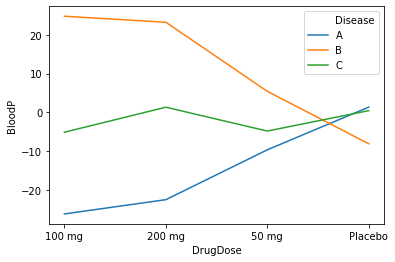

In [13]:
# Get the Series/Line plot to check for the interaction between drug dose and disease
print("Plot of Means for Drug Dataset")
drug_dose_into_disease = sns.lineplot(y = bloodp_mean['BloodP'],
                                     x = bloodp_mean['DrugDose'],
                                     hue = bloodp_mean['Disease'])

In [13]:
# Two-Way ANOVA with interactions
anova_model_inter = ols('BloodP ~ C(DrugDose) + C(Disease) + C(DrugDose):C(Disease)', data = drug).fit()
anova_table_inter = sm.stats.anova_lm(anova_model_inter, typ = 3)
anova_table_inter

,sum_sq,df,F,PR(>F)
Intercept,21.333333,1.0,0.049303,0.824567
C(DrugDose),6320.126747,3.0,4.868762,0.002886
C(Disease),772.268990,2.0,0.892386,0.411732
C(DrugDose):C(Disease),17146.316981,6.0,6.604404,0.000003
Residual,68366.458868,158.0,NaN,NaN


In [14]:
# Get the Summary 
anova_model_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BloodP   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     7.664
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           1.59e-10
Time:                        09:16:16   Log-Likelihood:                -750.95
No. Observations:                 170   AIC:                             1526.
Df Residuals:                     158   BIC:                             1564.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            1.3333      6.005      0.222      0.825     -10.527      13.193
C(DrugDose)[T.2]                   -11.0208      7.944     -1.387      0.167     -26.710       4.669
C(DrugDose)[T.3]                   -27.5641      8.327     -3.310      0.001     -44.011     -11.117
C(DrugDose)[T.4]                   -23.8889      7.752     -3.082      0.002     -39.200      -8.578
C(Disease)[T.B]                     -9.4667      8.056     -1.175      0.242     -25.379       6.445
C(Disease)[T.C]                     -0.9048      8.183     -0.111      0.912     -17.067      15.258
C(DrugDose)[T.2]:C(Disease)[T.B]    24.5542     10.991      2.234      0.027       2.847      46.262
C(DrugDose)[T.3]:C(Disease)[T.B]    60.4832     11.362      5.323      0.000      38.042      82.924
C(DrugDose)[T.4]:C(Disease)[T.B]    55.2530     11.056      4.998      0.000      33.417      77.089
C(DrugDose)[T.2]:C(Disease)[T.C]     5.7461     11.282      0.509      0.611     -16.538      28.030
C(DrugDose)[T.3]:C(Disease)[T.C]    21.9927     11.452      1.920      0.057      -0.627      44.612
C(DrugDose)[T.4]:C(Disease)[T.C]    24.7680     11.148      2.222      0.028       2.749      46.787
==============================================================================
Omnibus:                        0.355   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.318
Skew:                          -0.104   Prob(JB):                        0.853
Kurtosis:                       2.963   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# Perform paiswise comparison test on interaction term
import pingouin as pg
posthocs = pg.pairwise_ttests(dv='BloodP', within='Disease', between='DrugDose',
                              subject='PatientID', data=drug, padjust='holm')
# pg.print_table(posthocs)
posthocs

ValueError: Repeated measures dataframe is not balanced. `Subjects` must have the same number of elements in all conditions, even when missing values are present.